In [7]:
# Import the 
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [13]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None,10])

In [32]:
# What is this x? Some sort of placeholder... 
# Not an actual value.
x

<tf.Tensor 'Placeholder_2:0' shape=(?, 784) dtype=float32>

In [46]:
x._shape

TensorShape([Dimension(None), Dimension(784)])

In [61]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [64]:
# This gives us an error, 
# since the weights are not yet initialized
W.eval()

FailedPreconditionError: Attempting to use uninitialized value Variable_4
	 [[Node: _send_Variable_4_0 = _Send[T=DT_FLOAT, client_terminated=true, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=6934171064607249373, tensor_name="Variable_4:0", _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_4)]]

In [65]:
# Initialize the variables. Defaults to 0's.

# Does not work on older TensorFlow versions.
#sess.run(tf.global_variables_initializer())

# Use this line for older tensorflow versions.
sess.run(tf.initialize_all_variables())

In [67]:
# Yay! We can now see the (all zero) weights.
W.eval()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [77]:
# This is a numpy array now.
tmp = W.eval()
print(type(tmp))
print(W.eval().shape)

<class 'numpy.ndarray'>
(784, 10)


In [71]:
# Check out the b values.
b.eval()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [88]:
# This does not work... as might be expected, 
# we cannot assign this way.
b.eval()[0] = 1
b.eval()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [78]:
# 
y = tf.matmul(x,W) + b

In [81]:
# This does not work, since nothing has been evaluated yet.
# y is just a placeholder for now.
y.eval()

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-b2a67d8d3bda>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=[None, 784])
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [91]:
errors = tf.nn.softmax_cross_entropy_with_logits(y,y_)

In [92]:
cross_entropy = tf.reduce_mean(errors)

In [93]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Whoa! There's a lot going on here.
Let's break this down.

In [94]:
batch = mnist.train.next_batch(100)

In [104]:
print(type(batch))
# Tuples are like lists, but tupples cannot be changed.

# Each item in the tupple is a numpy array.
print(type(batch[0]))

<class 'tuple'>
<class 'numpy.ndarray'>


In [116]:
# This must be the data... 
# i.e., 100 images by (28*28)=784
batch[0].shape

(100, 784)

In [118]:
# This must be class labels. 100 images each with 10
# possible classes.
batch[1].shape

(100, 10)

In [120]:
# Nothing here.
batch[2].shape

IndexError: tuple index out of range

In [121]:
import numpy as np

In [122]:
np.sqrt(784)

28.0

In [137]:
idx = 0
img = np.reshape(batch[0][idx], [28,28])

In [126]:
img.shape

(28, 28)

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline # So the figures are shown inline.

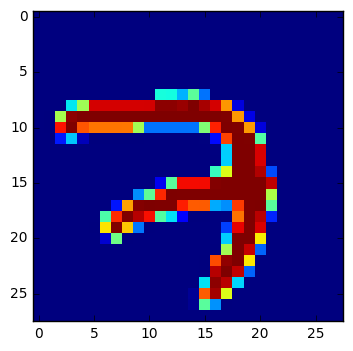

In [134]:
# What is this..? Looks like a messed up number.
plt.imshow(img, interpolation="none")

In [138]:
# Check the class label.
# Okay... this should be a 7 I guess? 
# Counting starts at 0...7
batch[1][idx]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [139]:
idx = 2
img = np.reshape(batch[0][idx], [28,28])

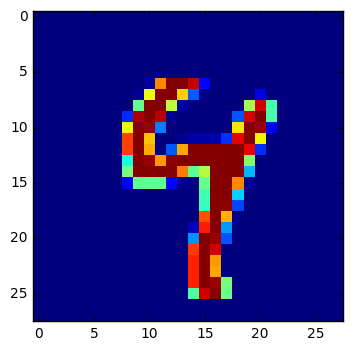

In [140]:
# Okay better.
plt.imshow(img, interpolation="none")

In [141]:
# Hope to see a 4 here.
# Yay! It does indicate a 4.
batch[1][idx]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [144]:
feed_dict={x: batch[0], y_ : batch[1]}

In [167]:
# What is this...? 
# A dictionary that has x,y as the key values,
# and the images (batch[0]) and class labels (batch[1])
type(feed_dict)

dict

In [168]:
# Look at all the keys for this dictionary.
for key in feed_dict.keys():
    print(key)
    
# Hmmm... so the tensor is the key...

Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_3:0", shape=(?, 10), dtype=float32)


In [170]:
# Take 1 step.
train_step.run(feed_dict=feed_dict)

In [176]:
# Okay... so I think this takes ones gradient step.
# Now how can we check our predicted values?
# This gives an error...
y.eval()

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-b2a67d8d3bda>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=[None, 784])
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [178]:
tf.argmax(y,1).eval()

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-b2a67d8d3bda>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=[None, 784])
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
